# E-Commerce Sales Forecasting 

Utilized time series analysis using ARIMA for 30 days sales forecasting, after ingesting daily sales from E-Commerce SQL-Server Database.
### Tools: 
- Pandas for data manipulation.
- ARIMA for time-series forecasting.
- MatPlotLib & SeaBorn for visualization.

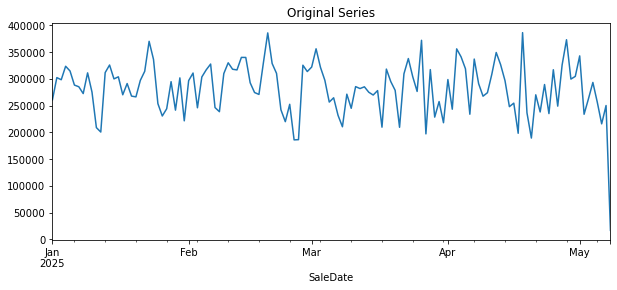

ADF Statistic: -5.6775
p-value: 0.0000
✅ Series is stationary
                               SARIMAX Results                                
Dep. Variable:             TotalSales   No. Observations:                  128
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1561.266
Date:                Wed, 21 May 2025   AIC                           3128.531
Time:                        17:44:44   BIC                           3137.064
Sample:                    01-01-2025   HQIC                          3131.998
                         - 05-08-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3342      0.091      3.659      0.000       0.155       0.513
ma.L1         -0.9961      0.105     -9.468      0.000      -1.202   

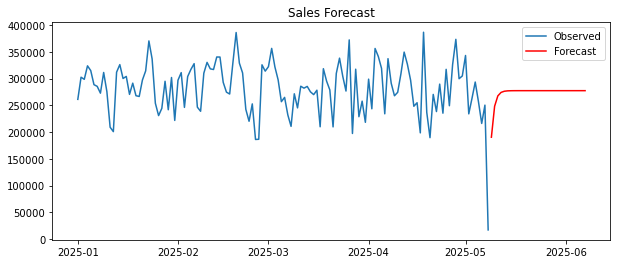

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load data
df = pd.read_csv('daily_sales.csv')  # Replace with your actual CSV file
df['SaleDate'] = pd.to_datetime(df['SaleDate'])
df.set_index('SaleDate', inplace=True)
df = df.asfreq('D')
df = df.fillna(method='ffill')

# Plot original series
df['y'] = df['TotalSales']
df['y'].plot(figsize=(10, 4), title='Original Series')
plt.show()

# ================================
# 1. Seasonal Differencing (weekly)
# ================================
df['y_diff'] = df['TotalSales'] - df['TotalSales'].shift(7)
df['y_diff'] = df['y_diff'].dropna()

# ================================
# 2. ADF Test Function
# ================================
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("✅ Series is stationary")
    else:
        print("⚠️ Series is NOT stationary – consider more differencing or transformation")

# Check stationarity
check_stationarity(df['y_diff'].dropna())

# ================================
# 3. Fit ARIMA Model (based on new differenced series)
# ================================
model = ARIMA(df['TotalSales'], order=( 1, 1, 1
                                      ))  # You may change the order based on auto_arima suggestion
model_fit = model.fit()
print(model_fit.summary())

# ================================
# 4. Forecast
# ================================
n_steps = 30
forecast = model_fit.forecast(steps=n_steps)

# ================================
# 5. Plot Forecast
# ================================
plt.figure(figsize=(10, 4))
plt.plot(df['TotalSales'], label='Observed')
plt.plot(pd.date_range(df.index[-1], periods=n_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Sales Forecast')
plt.legend()
plt.show()


**Conclusion:** Sales are projected to stabilize around 270,000 after a sharp decline, indicating a potential recovery from recent volatility.

## END!